<a href="https://colab.research.google.com/github/kamyarmig/Daytrader-performance-statistics/blob/master/Stock_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this page is to be able to Analys the stock and have a good visual inspection at it**

Calling the proper libraries and
Calling the Source file for colab

In [1]:
!pip install mpl_finance

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

In [32]:
file = "/content/gdrive/My Drive/Colab Notebooks/AMD2.csv"

df = pd.read_csv(file,encoding='ISO-8859-1')
#df['Date'] = df['Date'].astype(float)
df.info()
print(df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    503 non-null    object 
 1   Open    503 non-null    float64
 2   High    503 non-null    float64
 3   Low     503 non-null    float64
 4   Close   503 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.8+ KB
(503, 5)


,Date,Open,High,Low,Close
0,2018-06-22,15.78,15.91,15.56,15.80
1,2018-06-25,15.64,15.74,14.54,15.11
2,2018-06-26,15.32,15.60,15.10,15.50
3,2018-06-27,15.65,15.76,14.96,14.97
4,2018-06-28,14.85,15.36,14.75,15.31


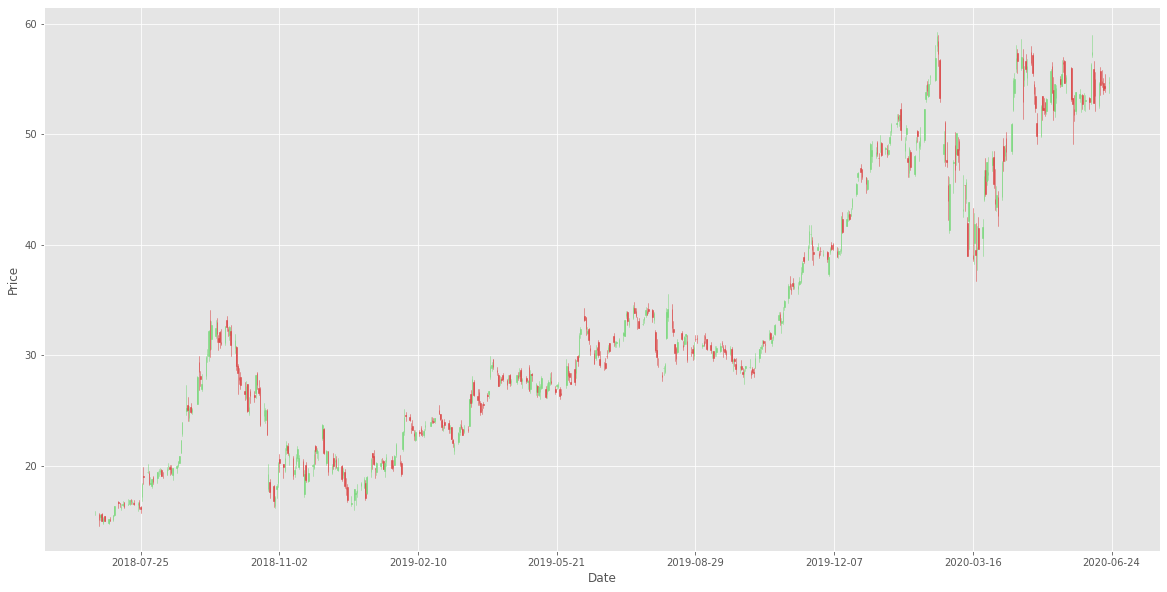

In [33]:
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = df.copy()
df_cp.Date = date2num(pd.to_datetime(df.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

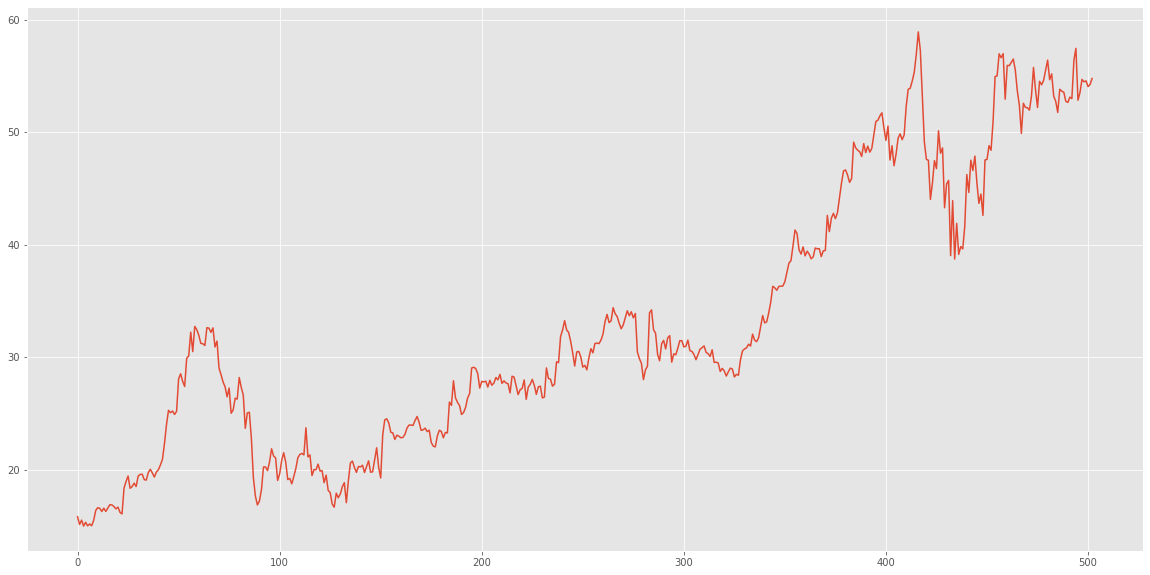

In [34]:
df.Close.plot()

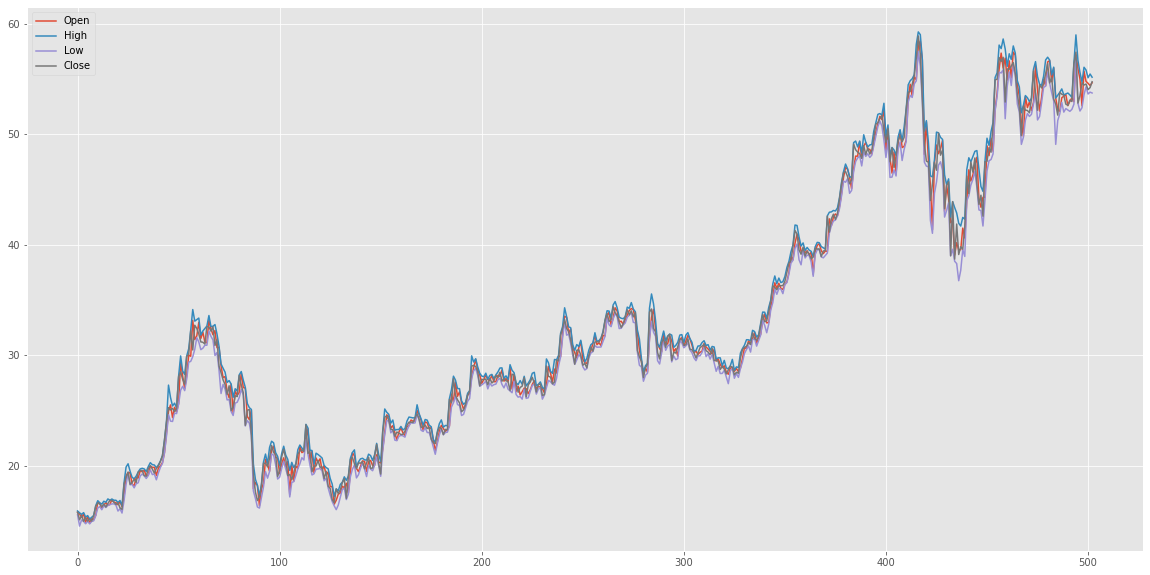

In [36]:
df.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

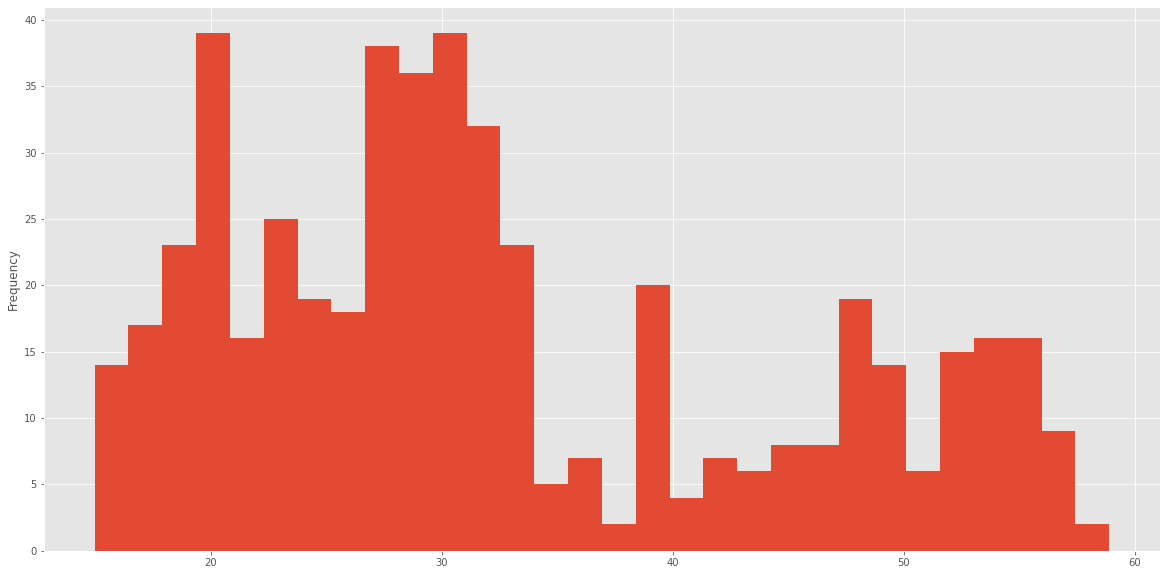

In [37]:
df.Close.plot(kind = "hist", bins = 30)

In [39]:
from sklearn import linear_model
x = np.arange(df.shape[0]).reshape((-1,1))
y = df.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

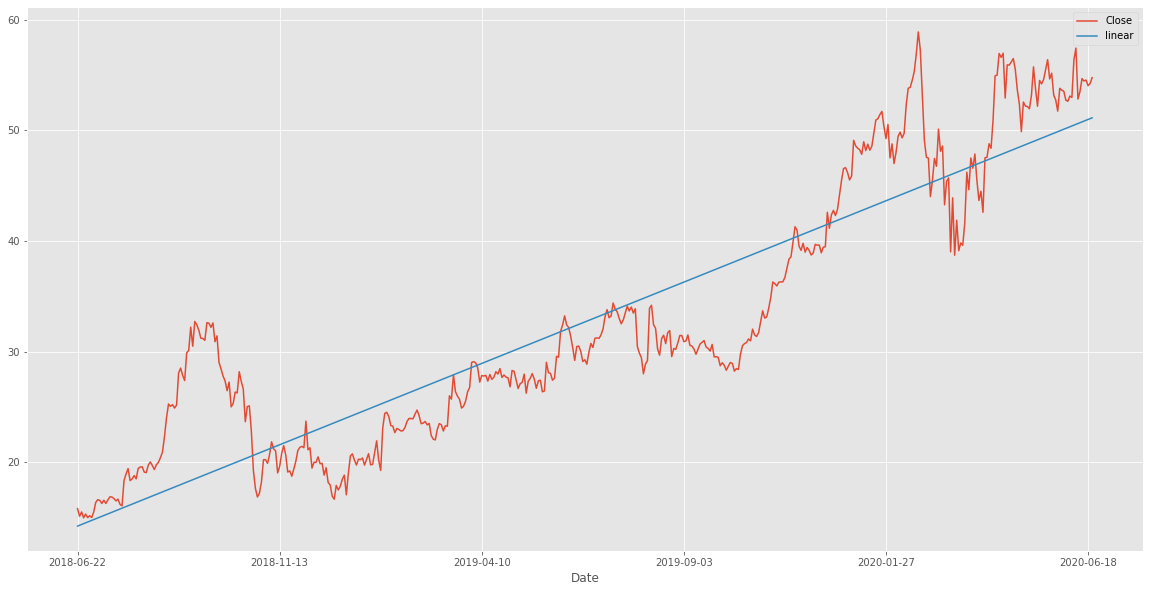

In [41]:
df['linear'] = pred
df.plot(kind="line", x="Date", y = ["Close", "linear"])

In [ ]:
tesla["CloselogDiff"] = tesla.Closelog - tesla.CloselogShift1
tesla.CloselogDiff.plot()